# Introduction
In this notebook you can see how I deal with linear regression. Below you can see me using simple linear regression and multiple linear. Also how I test the data and how I use data visualisation.

# Setting Up Data
In this section I just upload the data from my google drive and import some tools I'm going to use. You can check out the data I used for this project [here](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

In [ ]:
import csv
import pandas as pd
import numpy as np
#Extracts data from csv file
data = pd.read_csv('/content/drive/MyDrive/Year 4/Data Science And Machine Learning/Project/Student_Performance - Linear Regression/Student_Performance.csv')
data.head() #Displays first 5 entries

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Below I import the maptplot lib which is the library I use for data visualisation

In [ ]:
%matplotlib inline #This makes it so you don't need to write plt.show()
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<ipython-input-167-444997ff90a3>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')




---


#Linear Regression

Extract the relevant data. Which in this case I am going to use previous scores as my independent variable and the performance index as my dependent variable.

In [ ]:
x = data[['Previous Scores']]
#x = data[['Sample Question Papers Practiced']]
#x = data[['Sleep Hours']]
#x = data[['Hours Studied']]
y = data['Performance Index']

Below I just display the data on a scatter graph

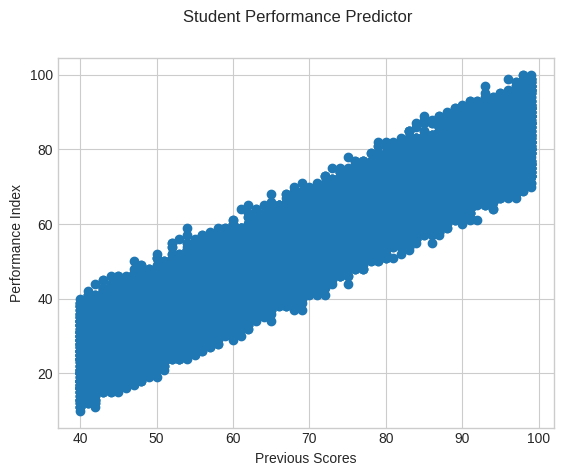

In [ ]:
plt.suptitle('Student Performance Predictor') # Title of graph
plt.xlabel('Previous Scores') # Label for x axis
plt.ylabel('Performance Index') # Label for y axis
plt.scatter(x,y) # Plots all the scatter points
plt.show()

Below I use a library called sklearn to train a model on the data and use linear Regression. You can also see I set up the linear regression plot on the previously created scatter graph

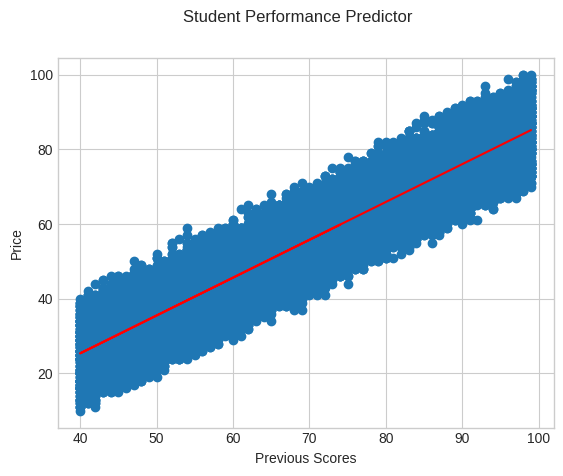

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x, y) # Trains the ML model on the data
yPredict = model.predict(x) #Sets variable that predicts the y axis

plt.suptitle('Student Performance Predictor') # Title of graph
plt.xlabel('Previous Scores') # Label for x axis
plt.ylabel('Price') # Label for y axis
plt.scatter(x,y)
plt.plot(x,yPredict, color='red', label='Regression line') #Plots the regression line
plt.show()

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     1.0138367015830554
Model intercept: -15.181799427126393


Below I calculate the r2 score, which is a measure of how much the variables correlate.

In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y,yPredict) #Gets the r2 score
print("R Squared value is : ", r_squared)

R Squared value is :  0.8375711642188022


Here I just place the r2 score on the previously created graph

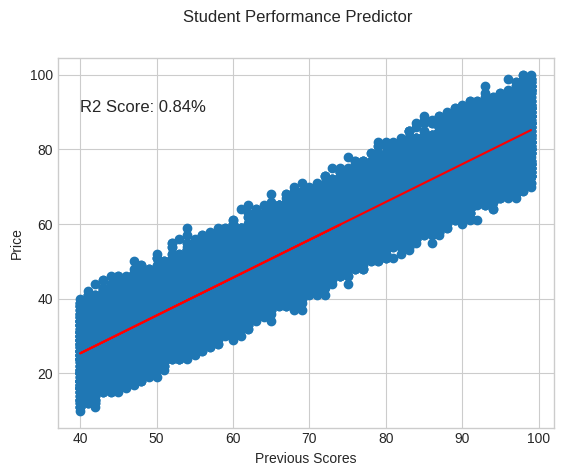

In [ ]:
plt.suptitle('Student Performance Predictor') # Title of graph
plt.xlabel('Previous Scores') # Label for x axis
plt.ylabel('Price') # Label for y axis
plt.scatter(x,y)
plt.plot(x,yPredict, color='red', label='Regression line')
#Places the r2 score on the graph
plt.text(40, 90,f"R2 Score: {round(r_squared,2)}%",fontsize=12)
plt.show()



---

# Multiple Linear Regression

Below I just test out how much corrolation do the two variables in x have on the performance index.

In [ ]:
x2 = data[['Sleep Hours','Hours Studied']]
y = data['Performance Index']
model2 = LinearRegression(fit_intercept=True)
model2.fit(x2, y) # Trains the ML model on the data
yPredict2 = model2.predict(x2)
r_squared = r2_score(y,yPredict2) #Gets the r2 score
print(x2)

      Sleep Hours  Hours Studied
0               9              7
1               4              4
2               7              8
3               5              5
4               8              7
...           ...            ...
9995            4              1
9996            8              7
9997            8              6
9998            7              9
9999            8              7

[10000 rows x 2 columns]


In [ ]:
r_squared = r2_score(y, yPredict2)
print("R Squared value is : ", r_squared)

R Squared value is :  0.14194399264845414


In the section below I wanted to see if I could display the data from above on a 3d graph.

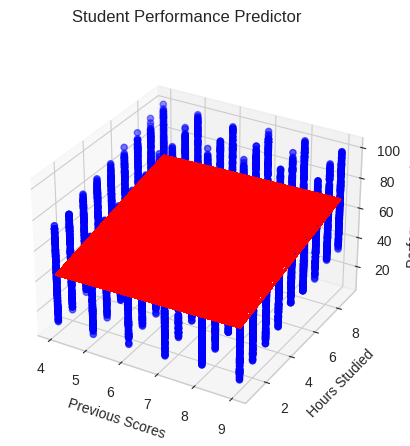

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
model2 = LinearRegression(fit_intercept=True)
x2 = data[['Sleep Hours','Hours Studied']]
y = data['Performance Index']
model2.fit(x2, y)
yPredict2 = model2.predict(x2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X1 = data['Sleep Hours']
X2 = data['Hours Studied']
Y = data['Performance Index']
ax.scatter(X1, X2, Y, color='b')
ax.plot(X1,X2, yPredict2, color='red')
ax.set_xlabel('Previous Scores')
ax.set_ylabel('Hours Studied')
ax.set_zlabel('Performance Index')
plt.suptitle('Student Performance Predictor')
plt.show()

As you can see above the data doesn't display well on this type of chart.
Below you can see how I tested out if Extracurricular activities have an impact on the students performance index. I did this using MLR and testing the r2 score of a group of the 2 groups of students.

In [ ]:
dfData = data[data['Extracurricular Activities'] == 'Yes']
x = dfData[['Sleep Hours','Hours Studied', 'Sample Question Papers Practiced']]
y = dfData['Performance Index']
data.head()
model = LinearRegression(fit_intercept=True)
model.fit(x, y) # Trains the ML model on the data
yPredict = model.predict(x)
r_squared = r2_score(y,yPredict) #Gets the r2 score
print("R square value for students with extracurricular activities: " , r_squared)

R square value for students with extracurricular activities:  0.14661578871438086


In [ ]:
dfData = data[data['Extracurricular Activities'] == 'No']
x = dfData[['Sleep Hours','Hours Studied', 'Sample Question Papers Practiced']]
y = dfData['Performance Index']
data.head()
model = LinearRegression(fit_intercept=True)
model.fit(x, y) # Trains the ML model on the data
yPredict = model.predict(x)
r_squared = r2_score(y,yPredict) #Gets the r2 score
print("R square value for students with no extracurricular activities: ", r_squared)

R square value for students with no extracurricular activities:  0.14085691468848982


As you can see both of the r2 scores are very similar so most likely there isn't much of a difference between the both.



---


# Other Tests

I tried to add 40 to hours studied to see how it affects the data

In [ ]:
model = LinearRegression(fit_intercept=True)
x = data[['Hours Studied']]
y = data['Performance Index']
model.fit(x, y) # Trains the ML model on the data
yPredict = model.predict(x)
r_squared = r2_score(y,yPredict) #Gets the r2 score
print("R square value for students with less sleep: ", r_squared)

R square value for students with less sleep:  0.1396743750333912


In [ ]:
model = LinearRegression(fit_intercept=True)
x = data[['Hours Studied']]
y = data['Performance Index']
x['Hours Studied'] = x['Hours Studied'] + 4000
model.fit(x, y) # Trains the ML model on the data
yPredict = model.predict(x)
r_squared = r2_score(y,yPredict) #Gets the r2 score
print("R square value for students with more sleep: ", r_squared)

R square value for students with more sleep:  0.13967437503339097


<ipython-input-213-482340737798>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Hours Studied'] = x['Hours Studied'] + 4000


Didnt have much of an impact as evident by the r2 scores.



---


#Data Visualisation Tests

##Pie Chart

Below I made a pie chart representing the amount of students that do and don't have extracurricular Activities. You can see the source I used for this [here](https://www.w3schools.com/python/matplotlib_pie_charts.asp).

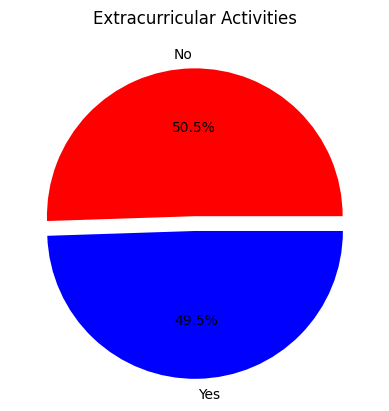

In [40]:
counts = data['Extracurricular Activities'].value_counts()
myColors = ['red', 'blue', 'green', 'pink']
myexplode = [0, 0.1]
plt.pie(counts, labels=['No','Yes'], colors=myColors, autopct='%1.1f%%', explode=myexplode)
plt.title('Extracurricular Activities')
plt.show()

##Bar Chart


Below you can see I made a bar chart representing the amount of students and the quantity of sample questions attempted by them.
You can see the source I used for this [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

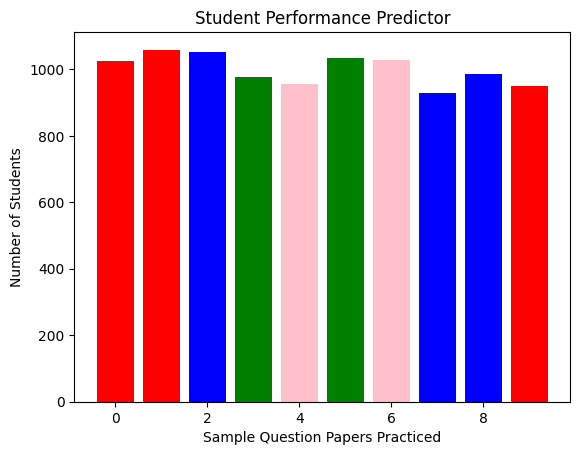

In [34]:
fig, ax = plt.subplots()

uniqueValues = data['Sample Question Papers Practiced'].unique()
counts = data['Sample Question Papers Practiced'].value_counts()
myColors = ['red', 'blue', 'green', 'pink']
ax.bar(uniqueValues, counts, color=myColors)
ax.set_title('Amount of sample questions Practiced')
ax.set_xlabel('Sample Question Papers Practiced')
ax.set_ylabel('Number of Students')
plt.show()